#                                                     ROUND 2 TO FINAL

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Redit the file name and read it with pandas. #? Why do we need to open with pandas?

markca = pd.read_csv('marketing_customer_analysis.csv')
markca = markca.drop(['UNNAMED: 0'], axis=1)
markca.head(3)

,CUSTOMER,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,INCOME,...,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE,VEHICLE TYPE
0,LZ68649,Washington,14947.917300,0,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
1,XL78013,Oregon,22332.439460,1,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
2,HG93801,Arizona,5154.764074,0,Extended,High School or Below,1/2/11,Employed,M,82730,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A


####   / Show the dataframe shape /

In [3]:
#Knowing numbers of rows and columns (n,c)
markca.shape

(4543, 25)

#### Describe dataframe

In [29]:
markca.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,4543.0,8033.714059,6959.529443,1904.000852,4039.089902,5846.520588,8936.596938,83325.381190
response,4543.0,0.141096,0.348159,0.000000,0.000000,0.000000,0.000000,1.000000
income,4543.0,37453.033238,30257.399536,0.000000,0.000000,34455.000000,61560.000000,99961.000000
monthly_premium_auto,4543.0,93.773278,35.093661,61.000000,69.000000,83.000000,110.000000,298.000000
months_since_last_claim,4543.0,15.111820,10.157925,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,4543.0,48.153863,28.146904,0.000000,24.000000,47.000000,72.000000,99.000000
number_of_open_complaints,4543.0,0.386309,0.907553,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,4543.0,2.980189,2.390362,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,4543.0,436.477525,295.026990,0.099007,265.686145,384.000000,552.000000,2893.239678


####    / Standardize header names /

In [4]:
cols = []
for i in range(len(markca.columns)):
    cols.append(markca.columns[i].lower().replace(' ', '_'))
markca.columns = cols

print(markca.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')


####    / Which columns are numerical? /

In [5]:
markca.select_dtypes(include=np.number)

,customer_lifetime_value,response,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,14947.917300,0,22139,100,34.0,31,0.0,2,480.000000
1,22332.439460,1,49078,97,10.0,3,0.0,2,484.013411
2,5154.764074,0,82730,127,13.0,31,0.0,1,442.521087
3,5454.587929,0,66334,69,25.0,25,0.0,4,331.200000
4,5326.677654,0,76717,66,26.0,10,0.0,6,300.528579
...,...,...,...,...,...,...,...,...,...
4538,3579.023825,0,28304,91,10.0,30,2.0,1,655.200000
4539,2771.663013,0,59855,74,30.0,82,4.0,1,355.200000
4540,19228.463620,0,0,187,14.0,32,0.0,2,897.600000
4541,5259.444853,0,61146,65,7.0,68,0.0,6,273.018929


#### / Which columns are categorical? /

In [6]:
markca.select_dtypes(include=object)

,customer,state,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,LZ68649,Washington,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
1,XL78013,Oregon,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
2,HG93801,Arizona,Extended,High School or Below,1/2/11,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
3,KR82385,California,Basic,Master,1/26/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
4,FH51383,California,Basic,High School or Below,2/7/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,PP30874,California,Extended,High School or Below,1/24/11,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,A
4539,SU71163,Arizona,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
4540,QI63521,Nevada,Basic,High School or Below,2/24/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
4541,KX53892,Oregon,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A


In [10]:
#The following code can return just the names of the columns.It's handy to read it all together in the same paragrhap.
categorial_heads = markca.select_dtypes(include=['object']).columns.tolist()
print(categorial_heads)

['customer', 'state', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type']


In [8]:
markca.select_dtypes(np.number)
#numercial_heads = markca.select_dtypes(include=['number']).columns.tolist()
#numerical_heads

,customer_lifetime_value,response,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,14947.917300,0,22139,100,34.0,31,0.0,2,480.000000
1,22332.439460,1,49078,97,10.0,3,0.0,2,484.013411
2,5154.764074,0,82730,127,13.0,31,0.0,1,442.521087
3,5454.587929,0,66334,69,25.0,25,0.0,4,331.200000
4,5326.677654,0,76717,66,26.0,10,0.0,6,300.528579
...,...,...,...,...,...,...,...,...,...
4538,3579.023825,0,28304,91,10.0,30,2.0,1,655.200000
4539,2771.663013,0,59855,74,30.0,82,4.0,1,355.200000
4540,19228.463620,0,0,187,14.0,32,0.0,2,897.600000
4541,5259.444853,0,61146,65,7.0,68,0.0,6,273.018929


####  / Check and deal with NaN values. /

In [11]:
# First let's have a look where and how many values we have. 
markca.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

In [12]:
# How many rows has at least one empty value? 4543 rows. Not good idea delete all these rows.
markca.shape[1] - markca.count(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
4538    0
4539    0
4540    0
4541    0
4542    0
Length: 4543, dtype: int64

In [13]:
round(markca.isna().sum()/len(markca),4)*100 

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
vehicle_type                     0.0
dtype: float64

In [14]:
# After overview last input, we still don't know if how spread are the empty values. 
# Maybe the empty values from the 'STATE' column are in the same row than the empty values from 'RESPONSE'.
# I would like to count how many rows have 2, 3 or more empty values. And asses the number of rows to remove them from the dataset.

empty_values_rows = markca.isnull().sum(axis=1)
empty_values_rows = empty_values_rows[empty_values_rows >= 2].value_counts()
print(empty_values_rows)

# IT DOESN'T WORK.
# This code returns how many rows has empty values. 
# It is handy to know the impact deleting all rows with empty values in our dataset.

Series([], dtype: int64)


####  Datetime format - Extract the months from the dataset and store in a separate column./

In [21]:
markca['Month'] = pd.DatetimeIndex(markca['effective_to_date']).month
markca
markca['Month'] = pd.to_datetime(markca['effective_to_date'], format='%m/%d/%y').dt.strftime('%B')
markca

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,Month
0,LZ68649,Washington,14947.917300,0,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
1,XL78013,Oregon,22332.439460,1,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
2,HG93801,Arizona,5154.764074,0,Extended,High School or Below,1/2/11,Employed,M,82730,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,January
3,KR82385,California,5454.587929,0,Basic,Master,1/26/11,Employed,M,66334,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,January
4,FH51383,California,5326.677654,0,Basic,High School or Below,2/7/11,Employed,F,76717,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,PP30874,California,3579.023825,0,Extended,High School or Below,1/24/11,Employed,F,28304,...,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,January
4539,SU71163,Arizona,2771.663013,0,Basic,College,1/7/11,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,January
4540,QI63521,Nevada,19228.463620,0,Basic,High School or Below,2/24/11,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,February
4541,KX53892,Oregon,5259.444853,0,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January


#### Filtering

In [26]:
markca_filtered = markca[markca['Month'].isin(['January', 'February', 'March'])]
markca_filtered

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,Month
0,LZ68649,Washington,14947.917300,0,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
1,XL78013,Oregon,22332.439460,1,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
2,HG93801,Arizona,5154.764074,0,Extended,High School or Below,1/2/11,Employed,M,82730,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,January
3,KR82385,California,5454.587929,0,Basic,Master,1/26/11,Employed,M,66334,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,January
4,FH51383,California,5326.677654,0,Basic,High School or Below,2/7/11,Employed,F,76717,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,PP30874,California,3579.023825,0,Extended,High School or Below,1/24/11,Employed,F,28304,...,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,January
4539,SU71163,Arizona,2771.663013,0,Basic,College,1/7/11,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,January
4540,QI63521,Nevada,19228.463620,0,Basic,High School or Below,2/24/11,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,February
4541,KX53892,Oregon,5259.444853,0,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January


In [24]:
markca['months_since_last_claim'] = markca['months_since_last_claim'].fillna('0')
markca

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,Month
0,LZ68649,Washington,14947.917300,0,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
1,XL78013,Oregon,22332.439460,1,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
2,HG93801,Arizona,5154.764074,0,Extended,High School or Below,1/2/11,Employed,M,82730,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,January
3,KR82385,California,5454.587929,0,Basic,Master,1/26/11,Employed,M,66334,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,January
4,FH51383,California,5326.677654,0,Basic,High School or Below,2/7/11,Employed,F,76717,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,PP30874,California,3579.023825,0,Extended,High School or Below,1/24/11,Employed,F,28304,...,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,January
4539,SU71163,Arizona,2771.663013,0,Basic,College,1/7/11,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,January
4540,QI63521,Nevada,19228.463620,0,Basic,High School or Below,2/24/11,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,February
4541,KX53892,Oregon,5259.444853,0,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January


,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,4543.0,8033.714059,6959.529443,1904.000852,4039.089902,5846.520588,8936.596938,83325.381190
response,4543.0,0.141096,0.348159,0.000000,0.000000,0.000000,0.000000,1.000000
income,4543.0,37453.033238,30257.399536,0.000000,0.000000,34455.000000,61560.000000,99961.000000
monthly_premium_auto,4543.0,93.773278,35.093661,61.000000,69.000000,83.000000,110.000000,298.000000
months_since_last_claim,4543.0,15.111820,10.157925,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,4543.0,48.153863,28.146904,0.000000,24.000000,47.000000,72.000000,99.000000
number_of_open_complaints,4543.0,0.386309,0.907553,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,4543.0,2.980189,2.390362,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,4543.0,436.477525,295.026990,0.099007,265.686145,384.000000,552.000000,2893.239678


In [30]:
print(markca.head(5))

  customer       state  customer_lifetime_value  response  coverage  \
0  LZ68649  Washington             14947.917300         0     Basic   
1  XL78013      Oregon             22332.439460         1  Extended   
2  HG93801     Arizona              5154.764074         0  Extended   
3  KR82385  California              5454.587929         0     Basic   
4  FH51383  California              5326.677654         0     Basic   

              education effective_to_date employmentstatus gender  income  \
0              Bachelor           2/10/11         Employed      M   22139   
1               College           1/11/11         Employed      M   49078   
2  High School or Below            1/2/11         Employed      M   82730   
3                Master           1/26/11         Employed      M   66334   
4  High School or Below            2/7/11         Employed      F   76717   

   ... number_of_policies     policy_type        policy  renew_offer_type  \
0  ...                  2   Perso

In [31]:
first_quarter = markca[(markca['Month'] >= 1) & (markca['Month'] <= 3)]
print(first_quarter)

TypeError: '>=' not supported between instances of 'str' and 'int'

In [32]:
markca['month'] = markca['effective_to_date'].dt.month
markca
markca[markca['month'].isin([1,2,3])]
#Watch out with filters!! just assing a name for them if you need it. 
#Otherwise, you will set the filter editing the original dataset. 

AttributeError: Can only use .dt accessor with datetimelike values

In [33]:
markca.to_csv('cleaned_marketing_analysis.csv',index=False)

## ROUND 3

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns  #run it when you start this section

    / Show DataFrame info /

In [36]:
markca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4543 entries, 0 to 4542
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       4543 non-null   object 
 1   state                          4543 non-null   object 
 2   customer_lifetime_value        4543 non-null   float64
 3   response                       4543 non-null   int64  
 4   coverage                       4543 non-null   object 
 5   education                      4543 non-null   object 
 6   effective_to_date              4543 non-null   object 
 7   employmentstatus               4543 non-null   object 
 8   gender                         4543 non-null   object 
 9   income                         4543 non-null   int64  
 10  location_code                  4543 non-null   object 
 11  marital_status                 4543 non-null   object 
 12  monthly_premium_auto           4543 non-null   i

    / Describe DataFrame /

In [37]:
markca.describe()

,customer_lifetime_value,response,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000
mean,8033.714059,0.141096,37453.033238,93.773278,15.111820,48.153863,0.386309,2.980189,436.477525
std,6959.529443,0.348159,30257.399536,35.093661,10.157925,28.146904,0.907553,2.390362,295.026990
min,1904.000852,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4039.089902,0.000000,0.000000,69.000000,6.000000,24.000000,0.000000,1.000000,265.686145
50%,5846.520588,0.000000,34455.000000,83.000000,14.000000,47.000000,0.000000,2.000000,384.000000
75%,8936.596938,0.000000,61560.000000,110.000000,23.000000,72.000000,0.000000,4.000000,552.000000
max,83325.381190,1.000000,99961.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


    / Show a plot of the total number of responses /

In [43]:
markca['response'].value_counts()

0    3902
1     641
Name: response, dtype: int64

<Axes: xlabel='response', ylabel='count'>

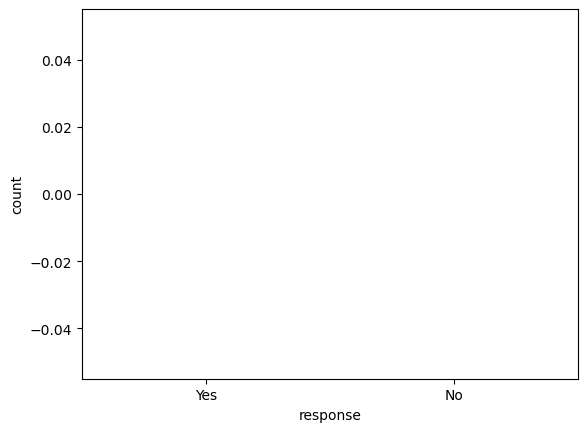

In [54]:
sns.countplot(data = markca, x = 'response', order = ['Yes', 'No'])

<Axes: xlabel='response', ylabel='count'>

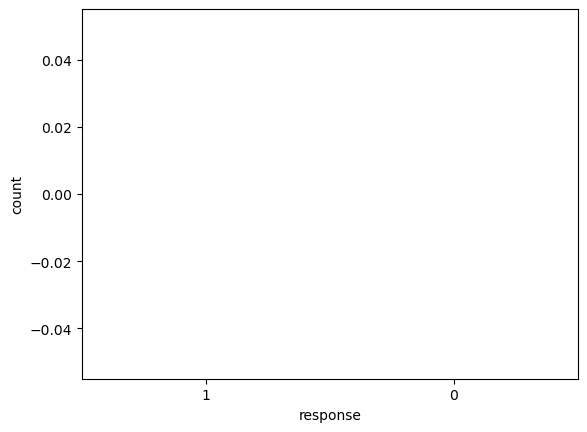

In [55]:
sns.countplot(data = markca, x = 'response', order = ['1', '0'])

In [51]:
markca['Response Rate'] = np.where(markca['response'] == 'Yes', 1, 0)
markca

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,Month,Response Rate
0,LZ68649,Washington,14947.917300,0,Basic,Bachelor,2/10/11,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February,0
1,XL78013,Oregon,22332.439460,1,Extended,College,1/11/11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January,0
2,HG93801,Arizona,5154.764074,0,Extended,High School or Below,1/2/11,Employed,M,82730,...,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,January,0
3,KR82385,California,5454.587929,0,Basic,Master,1/26/11,Employed,M,66334,...,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,January,0
4,FH51383,California,5326.677654,0,Basic,High School or Below,2/7/11,Employed,F,76717,...,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,February,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,PP30874,California,3579.023825,0,Extended,High School or Below,1/24/11,Employed,F,28304,...,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,January,0
4539,SU71163,Arizona,2771.663013,0,Basic,College,1/7/11,Employed,M,59855,...,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,January,0
4540,QI63521,Nevada,19228.463620,0,Basic,High School or Below,2/24/11,Unemployed,M,0,...,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,February,0
4541,KX53892,Oregon,5259.444853,0,Basic,College,1/6/11,Employed,F,61146,...,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January,0


    / Show a plot of the response rate by the sales channel /

In [40]:
(markca['sales_channel'].dtype)

dtype('O')

In [61]:
categorial_heads = markca.select_dtypes(include=['object']).columns.tolist()
print(categorial_heads)

['customer', 'state', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type', 'Month']


In [62]:
numerical_heads = markca.select_dtypes(include=['number']).columns.tolist()
print(numerical_heads)

['customer_lifetime_value', 'response', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount', 'Response Rate']


<Axes: xlabel='sales_channel', ylabel='Response Rate'>

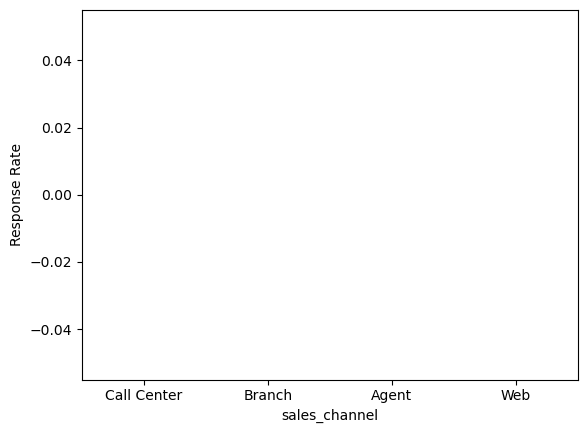

In [63]:
sns.barplot(x = 'sales_channel', y = 'Response Rate', data = markca )

In [65]:
# Plot response rate by Sales Channel
markca['response'] = np.where(markca['response'] == 'Yes', 1, 0)
print (markca)

     customer       state  customer_lifetime_value  response  coverage  \
0     LZ68649  Washington             14947.917300         0     Basic   
1     XL78013      Oregon             22332.439460         0  Extended   
2     HG93801     Arizona              5154.764074         0  Extended   
3     KR82385  California              5454.587929         0     Basic   
4     FH51383  California              5326.677654         0     Basic   
...       ...         ...                      ...       ...       ...   
4538  PP30874  California              3579.023825         0  Extended   
4539  SU71163     Arizona              2771.663013         0     Basic   
4540  QI63521      Nevada             19228.463620         0     Basic   
4541  KX53892      Oregon              5259.444853         0     Basic   
4542  WA60547  California             11971.977650         0   Premium   

                 education effective_to_date employmentstatus gender  income  \
0                 Bachelor     

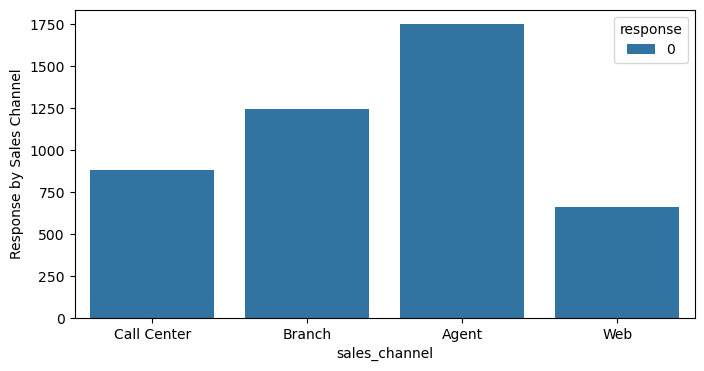

In [67]:
# ns.catplot(x='SALES CHANNEL', y='RESPONSE', kind='bar', data=markca)
plt.figure(figsize=(8,4))
sns.countplot(x='sales_channel', hue='response', data=markca)
plt.ylabel('Response by Sales Channel')
plt.show()

    / Show a plot of the response rate by the total claim amount /

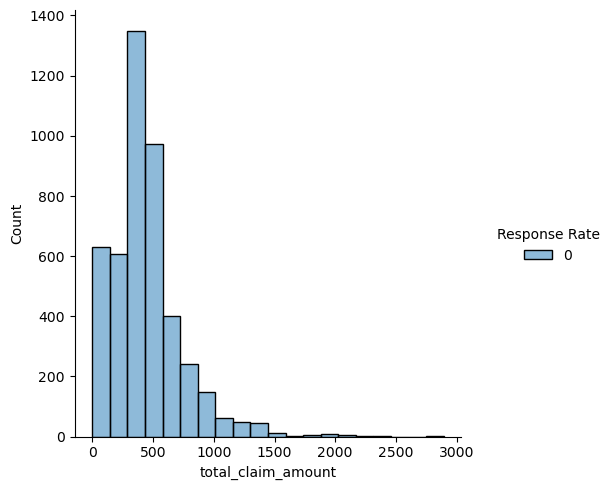

In [68]:
sns.displot(markca, x = 'total_claim_amount', hue = 'Response Rate', bins=20)

In [69]:
import pandas as pd
import os

In [70]:
# I will import the excel again. 
markca.to_csv('marketing_customer_analysis_after_round_3_and_4.csv', index=False)
#index=False means export all columns except the index column created always by python.

In [71]:
#Issue. The previous code ran but, my Windows searching bar does not want to show me where the doument is. 

In [72]:
# Get the current working directory
cwd = os.getcwd()

# Join the file name with the current working directory to get the full file path
file_path = os.path.join(cwd, 'marketing_customer_analysis_after_round_3_and_4.csv')

# Print the full file path
print(file_path)

C:\Users\IUREK\Desktop\IH-Labs\lab-customer-analysis-round-2\marketing_customer_analysis_after_round_3_and_4.csv


In [73]:
# Now, I know where it is and the path is in the file. 
# Next time I will use a code which include the path where I want. But with the one I used here, I realized that 
# By default, the to_csv() method of a Pandas DataFrame will save 
# the file in the current working directory with the given file name.

### ROUND 4

In [74]:
markca = pd.read_csv ('marketing_customer_analysis.csv')

In [75]:
#Check the data types of the columns. 
markca.dtypes

UNNAMED: 0                         int64
CUSTOMER                          object
STATE                             object
CUSTOMER LIFETIME VALUE          float64
RESPONSE                           int64
COVERAGE                          object
EDUCATION                         object
EFFECTIVE TO DATE                 object
EMPLOYMENTSTATUS                  object
GENDER                            object
INCOME                             int64
LOCATION CODE                     object
MARITAL STATUS                    object
MONTHLY PREMIUM AUTO               int64
MONTHS SINCE LAST CLAIM          float64
MONTHS SINCE POLICY INCEPTION      int64
NUMBER OF OPEN COMPLAINTS        float64
NUMBER OF POLICIES                 int64
POLICY TYPE                       object
POLICY                            object
RENEW OFFER TYPE                  object
SALES CHANNEL                     object
TOTAL CLAIM AMOUNT               float64
VEHICLE CLASS                     object
VEHICLE SIZE    

In [81]:
#Filtering the categorial and numerical.

In [80]:
categoricals = markca.select_dtypes(include=[object])
categoricals

,CUSTOMER,STATE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,LOCATION CODE,MARITAL STATUS,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,VEHICLE CLASS,VEHICLE SIZE,VEHICLE TYPE
0,LZ68649,Washington,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
1,XL78013,Oregon,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
2,HG93801,Arizona,Extended,High School or Below,1/2/11,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
3,KR82385,California,Basic,Master,1/26/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
4,FH51383,California,Basic,High School or Below,2/7/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,PP30874,California,Extended,High School or Below,1/24/11,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,A
4539,SU71163,Arizona,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
4540,QI63521,Nevada,Basic,High School or Below,2/24/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
4541,KX53892,Oregon,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A


In [76]:
#Categorical 
categorial_heads = markca.select_dtypes(include=['object']).columns.tolist()
print(categorial_heads)

['CUSTOMER', 'STATE', 'COVERAGE', 'EDUCATION', 'EFFECTIVE TO DATE', 'EMPLOYMENTSTATUS', 'GENDER', 'LOCATION CODE', 'MARITAL STATUS', 'POLICY TYPE', 'POLICY', 'RENEW OFFER TYPE', 'SALES CHANNEL', 'VEHICLE CLASS', 'VEHICLE SIZE', 'VEHICLE TYPE']


In [78]:
numericals = markca.select_dtypes(include=[np.number])
numericals

,UNNAMED: 0,CUSTOMER LIFETIME VALUE,RESPONSE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT
0,2,14947.917300,0,22139,100,34.0,31,0.0,2,480.000000
1,3,22332.439460,1,49078,97,10.0,3,0.0,2,484.013411
2,10,5154.764074,0,82730,127,13.0,31,0.0,1,442.521087
3,13,5454.587929,0,66334,69,25.0,25,0.0,4,331.200000
4,16,5326.677654,0,76717,66,26.0,10,0.0,6,300.528579
...,...,...,...,...,...,...,...,...,...,...
4538,10902,3579.023825,0,28304,91,10.0,30,2.0,1,655.200000
4539,10903,2771.663013,0,59855,74,30.0,82,4.0,1,355.200000
4540,10904,19228.463620,0,0,187,14.0,32,0.0,2,897.600000
4541,10906,5259.444853,0,61146,65,7.0,68,0.0,6,273.018929


In [77]:
#Numerical
numeral_heads = markca.select_dtypes(include=['number']).columns.tolist()
print(numeral_heads)

['UNNAMED: 0', 'CUSTOMER LIFETIME VALUE', 'RESPONSE', 'INCOME', 'MONTHLY PREMIUM AUTO', 'MONTHS SINCE LAST CLAIM', 'MONTHS SINCE POLICY INCEPTION', 'NUMBER OF OPEN COMPLAINTS', 'NUMBER OF POLICIES', 'TOTAL CLAIM AMOUNT']


In [85]:
numerical = markca.select_dtypes(include = np.number)
categorical = markca.select_dtypes(include = object)
numerical.shape
categorical.shape  #The have the same shape! That's a coincidence!

(4543, 16)

In [82]:
# Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
#(You can use np.number and np.object to select the numerical data types and categorical data types. respectively)

In [86]:
# New dataframes Overviews

In [87]:
categorical.describe().T # Less handy this time typing .T

,count,unique,top,freq
CUSTOMER,4543,4543,LZ68649,1
STATE,4543,5,California,1552
COVERAGE,4543,3,Basic,2759
EDUCATION,4543,5,Bachelor,1374
EFFECTIVE TO DATE,4543,59,1/10/11,105
EMPLOYMENTSTATUS,4543,5,Employed,2831
GENDER,4543,2,F,2326
LOCATION CODE,4543,3,Suburban,2844
MARITAL STATUS,4543,3,Married,2665
POLICY TYPE,4543,3,Personal Auto,3390


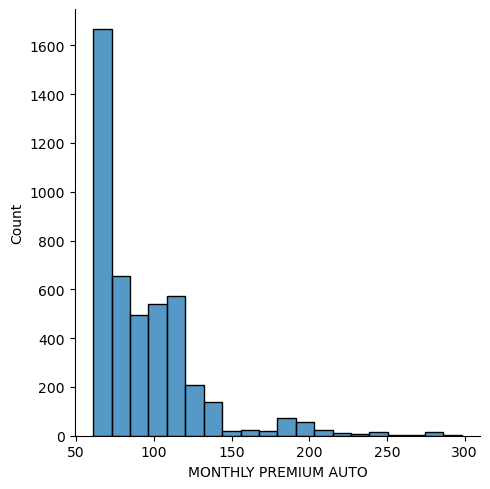

In [84]:
sns.displot(numericals, x= "MONTHLY PREMIUM AUTO", bins=20)

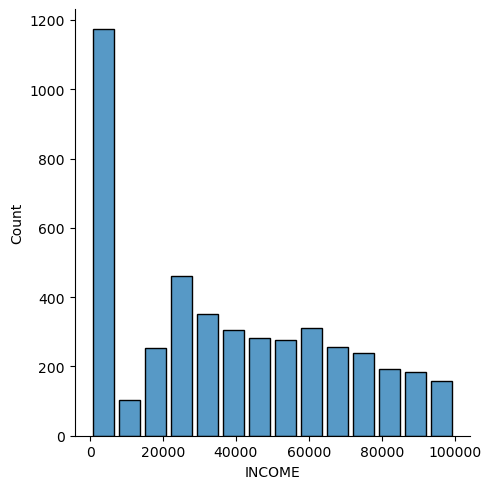

In [89]:
sns.displot(numericals, x="INCOME", shrink=.8)

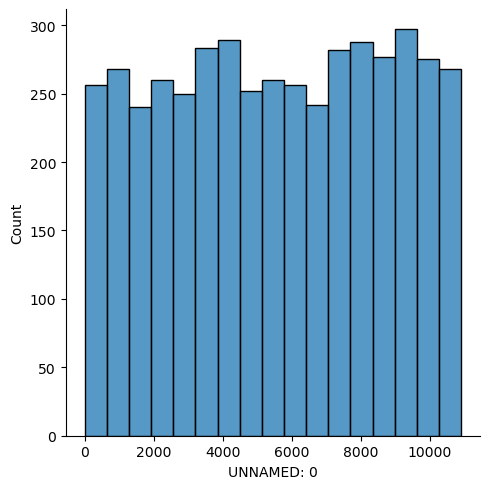

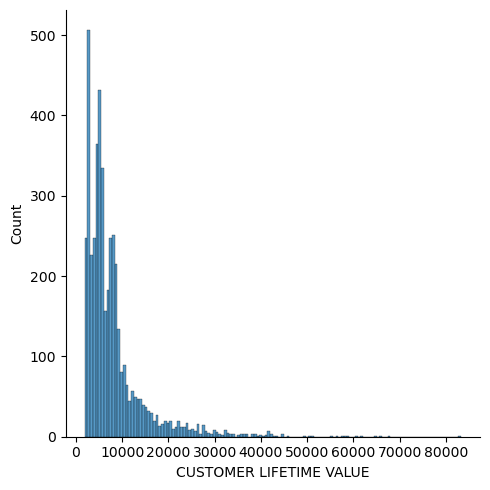

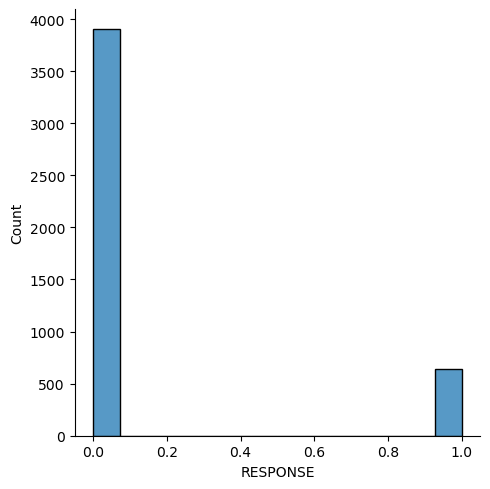

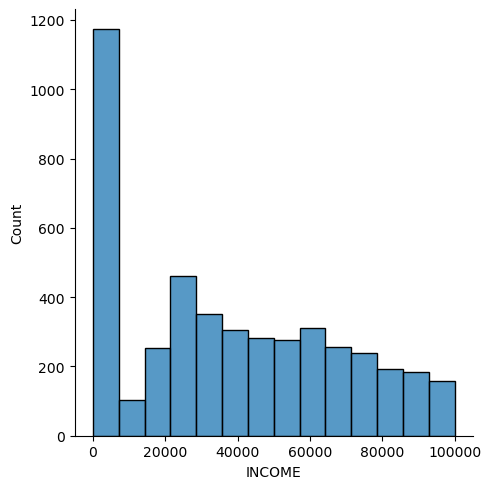

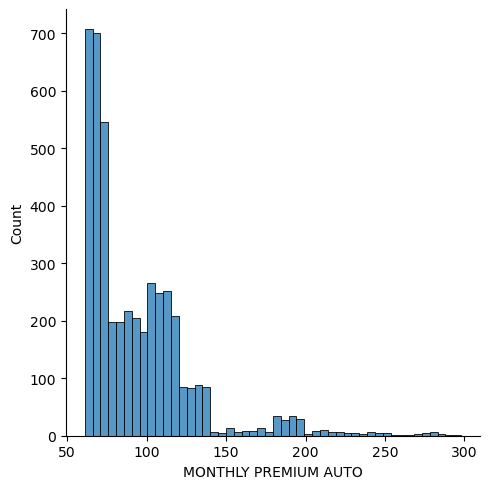

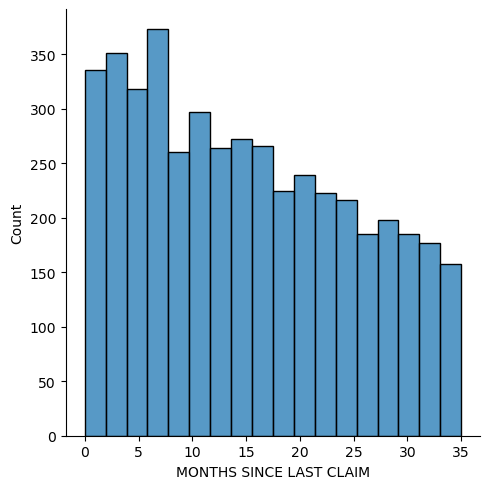

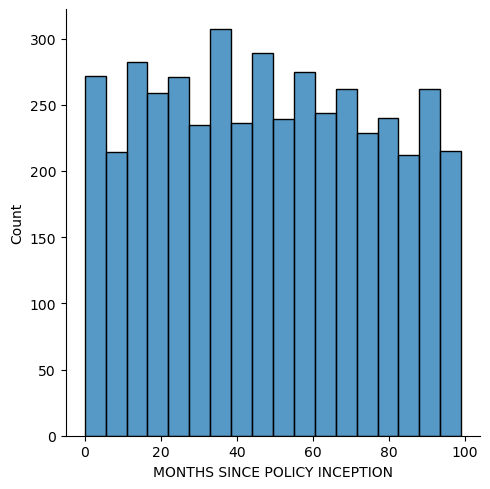

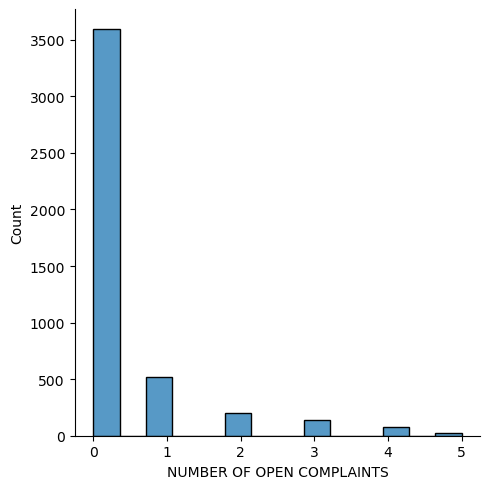

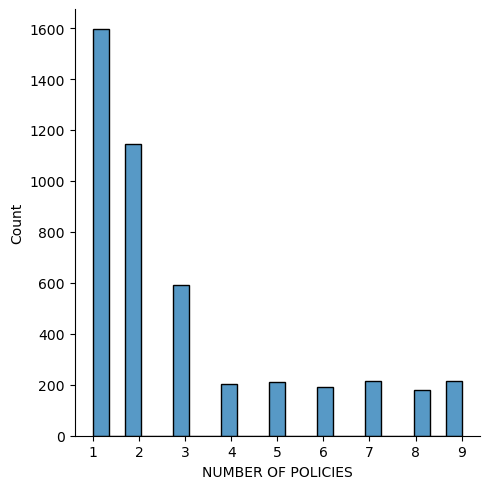

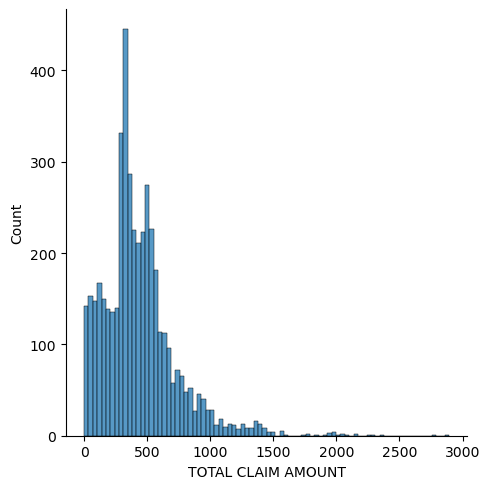

In [93]:
numericals_columns = list(numericals.head(0))

for i in numericals_columns:
    sns.displot(markca[i])

plt.show()

#### Use Matplotlib to construct histograms

In [94]:
import matplotlib.pyplot as plt

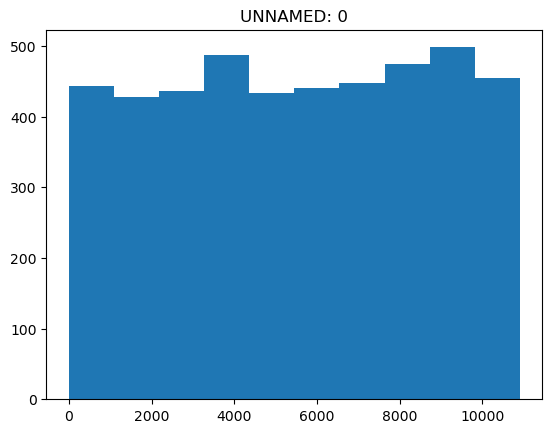

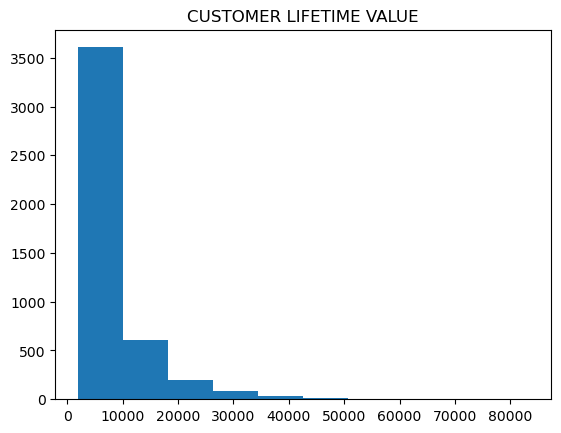

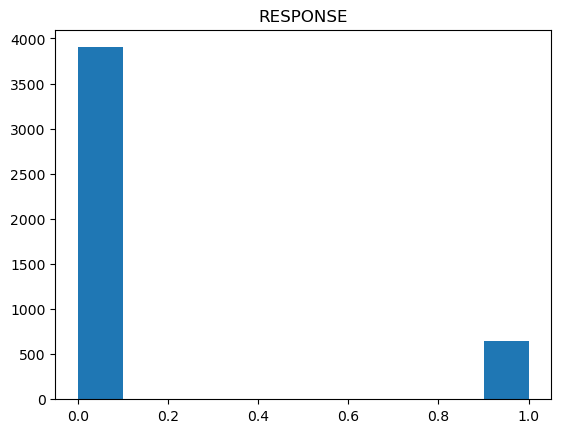

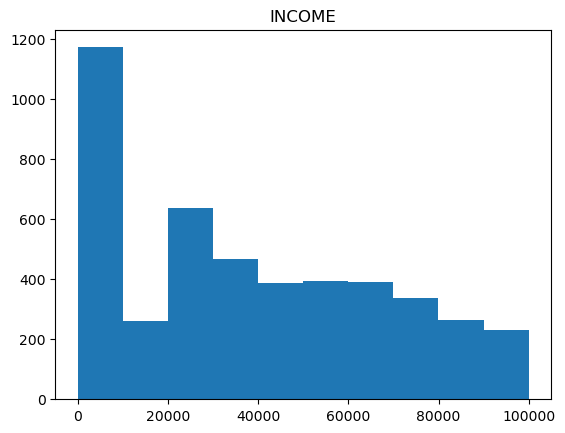

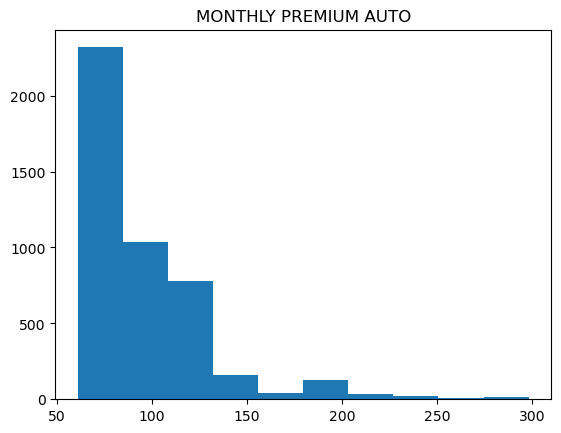

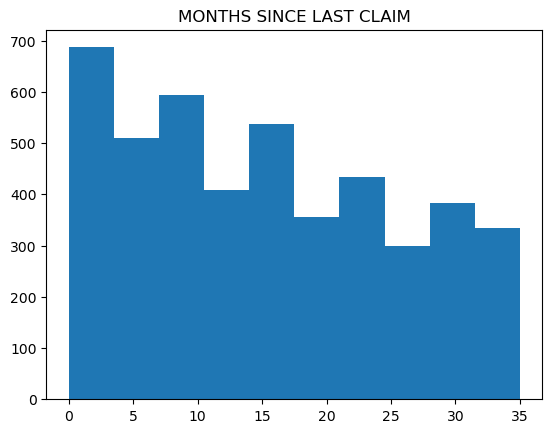

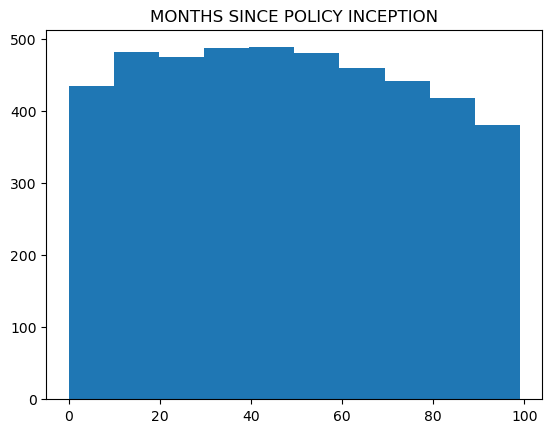

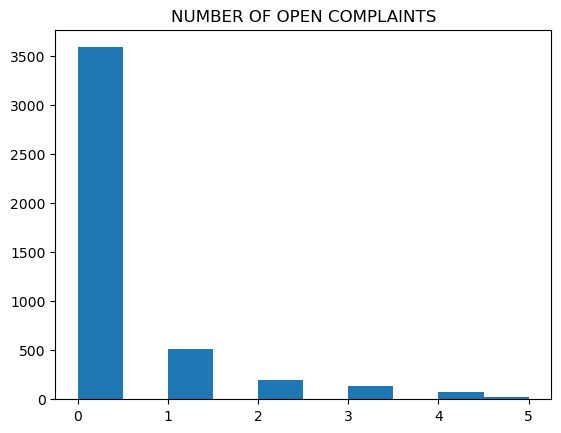

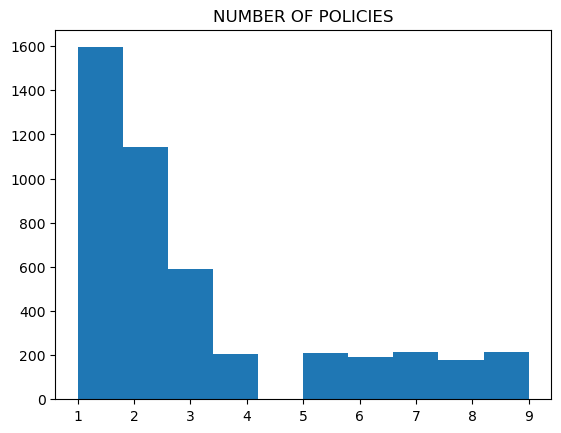

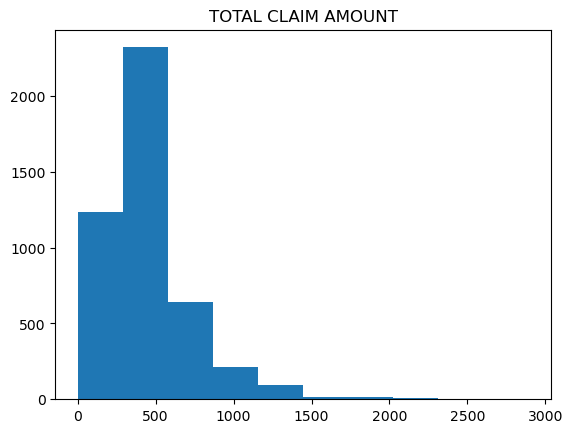

In [96]:
numericals_columns = list(numericals.head(0))

for i in numericals_columns:
    plt.hist(markca[i])
    plt.title(i)
    plt.show()

#### Do the distributions for different numerical variables look like a normal distribution?
The distributions don't look like normal. 

#### For the numerical variables, check the multicollinearity between the features. 
#### Please note that we will use the column total_claim_amount later as the target variable

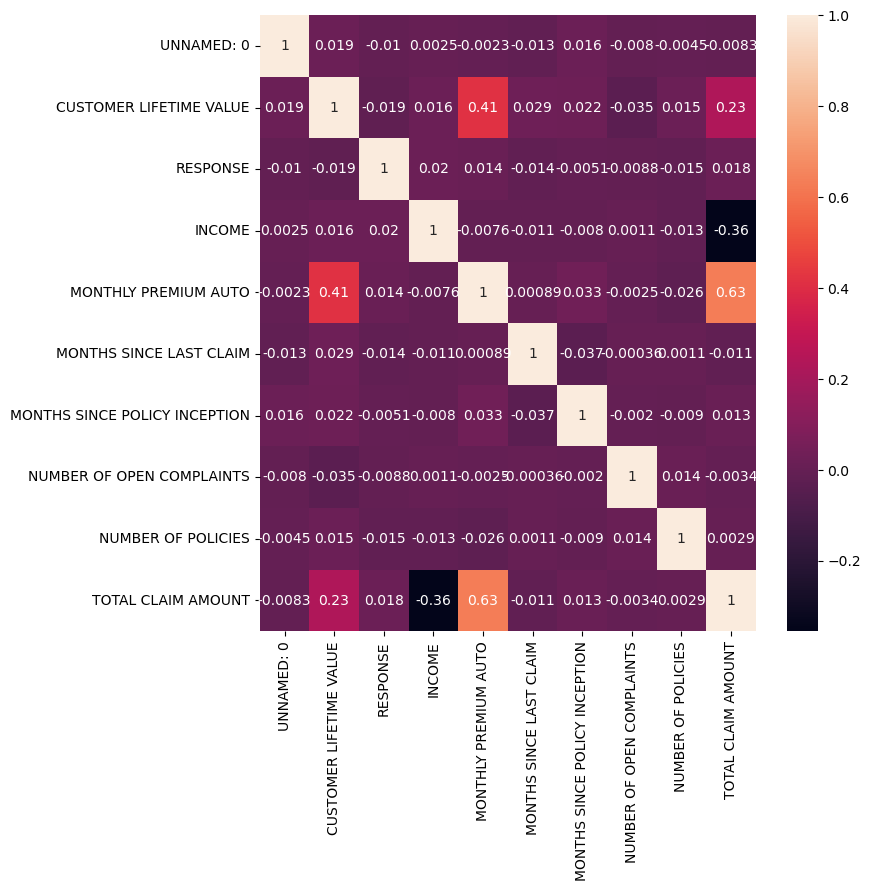

In [103]:
correlations_matrix = numerical.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [105]:
correlations_matrix

,UNNAMED: 0,CUSTOMER LIFETIME VALUE,RESPONSE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT
UNNAMED: 0,1.000000,0.018506,-0.010227,0.002476,-0.002327,-0.012626,0.016022,-0.007972,-0.004518,-0.008315
CUSTOMER LIFETIME VALUE,0.018506,1.000000,-0.018783,0.015914,0.413739,0.029199,0.022465,-0.034924,0.015397,0.228579
RESPONSE,-0.010227,-0.018783,1.000000,0.019743,0.013683,-0.013800,-0.005092,-0.008796,-0.015159,0.018033
INCOME,0.002476,0.015914,0.019743,1.000000,-0.007594,-0.010556,-0.007987,0.001149,-0.013199,-0.355311
MONTHLY PREMIUM AUTO,-0.002327,0.413739,0.013683,-0.007594,1.000000,0.000890,0.033422,-0.002469,-0.025578,0.630894
MONTHS SINCE LAST CLAIM,-0.012626,0.029199,-0.013800,-0.010556,0.000890,1.000000,-0.036879,-0.000364,0.001089,-0.011449
MONTHS SINCE POLICY INCEPTION,0.016022,0.022465,-0.005092,-0.007987,0.033422,-0.036879,1.000000,-0.001965,-0.009029,0.012610
NUMBER OF OPEN COMPLAINTS,-0.007972,-0.034924,-0.008796,0.001149,-0.002469,-0.000364,-0.001965,1.000000,0.014388,-0.003433
NUMBER OF POLICIES,-0.004518,0.015397,-0.015159,-0.013199,-0.025578,0.001089,-0.009029,0.014388,1.000000,0.002864
TOTAL CLAIM AMOUNT,-0.008315,0.228579,0.018033,-0.355311,0.630894,-0.011449,0.012610,-0.003433,0.002864,1.000000


In [107]:
markca.to_csv("cleaned_marketing_customer_round4.csv", index = False)

### ROUND 5

### X-y split

In [108]:
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler

In [112]:
y = markca['TOTAL CLAIM AMOUNT']
X = markca.drop(['TOTAL CLAIM AMOUNT'], axis=1)
X_num = X.select_dtypes (include =np.number)
X_cat = X.select_dtypes (include = object)

### NORMALIZE

In [114]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
x_normalized_1 = pd.DataFrame(x_normalized, columns=X_num.columns)
x_normalized_1

(4543, 9)


,UNNAMED: 0,CUSTOMER LIFETIME VALUE,RESPONSE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES
0,0.000000,0.160203,0.0,0.221476,0.164557,0.971429,0.313131,0.0,0.125
1,0.000092,0.250898,1.0,0.490971,0.151899,0.285714,0.030303,0.0,0.125
2,0.000734,0.039925,0.0,0.827623,0.278481,0.371429,0.313131,0.0,0.000
3,0.001009,0.043608,0.0,0.663599,0.033755,0.714286,0.252525,0.0,0.375
4,0.001284,0.042037,0.0,0.767469,0.021097,0.742857,0.101010,0.0,0.625
...,...,...,...,...,...,...,...,...,...
4538,0.999450,0.020572,0.0,0.283150,0.126582,0.285714,0.303030,0.4,0.000
4539,0.999542,0.010656,0.0,0.598784,0.054852,0.857143,0.828283,0.8,0.000
4540,0.999633,0.212775,0.0,0.000000,0.531646,0.400000,0.323232,0.0,0.125
4541,0.999817,0.041211,0.0,0.611699,0.016878,0.200000,0.686869,0.0,0.625


In [117]:
markca.to_csv("cleaned_marketing_cust_round5.csv", index = False)

### ROUND 6

One Hot/Label Encoding (categorical)

In [118]:
import math
from sklearn.preprocessing import OneHotEncoder

In [119]:
#One Hot/Label Encoding (categorical)

encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names_out(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

X_cat_encode.head()

,CUSTOMER_AA11235,CUSTOMER_AA16582,CUSTOMER_AA35519,CUSTOMER_AA56476,CUSTOMER_AA69265,CUSTOMER_AB31813,CUSTOMER_AB60627,CUSTOMER_AB62982,CUSTOMER_AB73565,CUSTOMER_AC13887,...,SALES CHANNEL_Branch,SALES CHANNEL_Call Center,SALES CHANNEL_Web,VEHICLE CLASS_Luxury Car,VEHICLE CLASS_Luxury SUV,VEHICLE CLASS_SUV,VEHICLE CLASS_Sports Car,VEHICLE CLASS_Two-Door Car,VEHICLE SIZE_Medsize,VEHICLE SIZE_Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [120]:
X_cat_encode.shape

(4543, 4642)

In [122]:
X = pd.concat([x_normalized_1, X_cat_encode], axis=1)
print(X)

      UNNAMED: 0  CUSTOMER LIFETIME VALUE  RESPONSE    INCOME  \
0       0.000000                 0.160203       0.0  0.221476   
1       0.000092                 0.250898       1.0  0.490971   
2       0.000734                 0.039925       0.0  0.827623   
3       0.001009                 0.043608       0.0  0.663599   
4       0.001284                 0.042037       0.0  0.767469   
...          ...                      ...       ...       ...   
4538    0.999450                 0.020572       0.0  0.283150   
4539    0.999542                 0.010656       0.0  0.598784   
4540    0.999633                 0.212775       0.0  0.000000   
4541    0.999817                 0.041211       0.0  0.611699   
4542    1.000000                 0.123653       0.0  0.642200   

      MONTHLY PREMIUM AUTO  MONTHS SINCE LAST CLAIM  \
0                 0.164557                 0.971429   
1                 0.151899                 0.285714   
2                 0.278481                 0.371429   

### Model Regression
#### Train-test split

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
X_train.head()

,UNNAMED: 0,CUSTOMER LIFETIME VALUE,RESPONSE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,CUSTOMER_AA11235,...,SALES CHANNEL_Branch,SALES CHANNEL_Call Center,SALES CHANNEL_Web,VEHICLE CLASS_Luxury Car,VEHICLE CLASS_Luxury SUV,VEHICLE CLASS_SUV,VEHICLE CLASS_Sports Car,VEHICLE CLASS_Two-Door Car,VEHICLE SIZE_Medsize,VEHICLE SIZE_Small
4419,0.973684,0.049732,0.0,0.610298,0.054852,0.171429,1.000000,0.0,1.000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2856,0.647258,0.040740,0.0,0.604686,0.016878,0.228571,0.535354,0.0,0.875,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1878,0.418852,0.039341,1.0,0.356389,0.016878,0.285714,0.565657,0.2,0.250,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1480,0.338621,0.043139,0.0,0.532698,0.025316,0.914286,0.101010,0.0,0.250,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2333,0.524299,0.025271,0.0,0.000000,0.240506,0.171429,0.343434,0.2,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [126]:
y_train.head()

4419     73.919629
2856    279.450351
1878    288.572108
1480    343.340361
2333    264.642948
Name: TOTAL CLAIM AMOUNT, dtype: float64

### Modeling

In [127]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [128]:
from sklearn.metrics import r2_score
predictions = lm.predict (X_train)
r2_score(y_train, predictions)

1.0

In [129]:
predictions

array([ 73.919629, 279.450351, 288.572108, ..., 297.6     , 882.871945,
        55.510526])

In [130]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7284645372972973

In [131]:
y_test[:6]

1647    620.011594
1476    304.156333
2111    345.600000
3612    297.600000
691     351.403677
2655    422.592370
Name: TOTAL CLAIM AMOUNT, dtype: float64

In [132]:
predictions_test[:6]

array([481.80781104, 501.04529199, 389.13845415, 390.74113933,
       433.97581937, 328.53721673])

### Model Validation - Metrics

In [133]:
from sklearn.metrics import mean_absolute_error, r2_score

In [134]:
# MAE

mae = mean_absolute_error(y_test, predictions_test)
print(mae) 

98.71332058066325


In [135]:
# MSE & RMSE

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse
rmse = math.sqrt(mse)  
print(rmse)  
mse 

147.2494155933662


21682.390392587877

In [136]:
# R2

from sklearn.metrics import mean_absolute_error, r2_score
r2 = r2_score(y_test, predictions_test)
r2

0.7284645372972973

In [137]:
y_test.mean()

423.8728075731571

### Improving the Model

In [145]:
#Dropping more columns.
#Columns dropped in total: 'customer', 'effective_to_date', 'marital_status','employment_status', data not needed

X_cat = X_cat.drop(['EFFECTIVE TO DATE', 'MARITAL STATUS'], axis=1) 

In [147]:
X_cat.head()

,CUSTOMER,STATE,COVERAGE,EDUCATION,EMPLOYMENTSTATUS,GENDER,LOCATION CODE,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,VEHICLE CLASS,VEHICLE SIZE,VEHICLE TYPE
0,LZ68649,Washington,Basic,Bachelor,Employed,M,Suburban,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
1,XL78013,Oregon,Extended,College,Employed,M,Suburban,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
2,HG93801,Arizona,Extended,High School or Below,Employed,M,Urban,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
3,KR82385,California,Basic,Master,Employed,M,Suburban,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
4,FH51383,California,Basic,High School or Below,Employed,F,Urban,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A


In [148]:
# Second "One Hot/Label Encoding (categorical)""

encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names_out(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

X_cat_encode.head()

,CUSTOMER_AA11235,CUSTOMER_AA16582,CUSTOMER_AA35519,CUSTOMER_AA56476,CUSTOMER_AA69265,CUSTOMER_AB31813,CUSTOMER_AB60627,CUSTOMER_AB62982,CUSTOMER_AB73565,CUSTOMER_AC13887,...,SALES CHANNEL_Branch,SALES CHANNEL_Call Center,SALES CHANNEL_Web,VEHICLE CLASS_Luxury Car,VEHICLE CLASS_Luxury SUV,VEHICLE CLASS_SUV,VEHICLE CLASS_Sports Car,VEHICLE CLASS_Two-Door Car,VEHICLE SIZE_Medsize,VEHICLE SIZE_Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [150]:
X = pd.concat([x_normalized_1, X_cat_encode], axis=1)
display(X)

,UNNAMED: 0,CUSTOMER LIFETIME VALUE,RESPONSE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,CUSTOMER_AA11235,...,SALES CHANNEL_Branch,SALES CHANNEL_Call Center,SALES CHANNEL_Web,VEHICLE CLASS_Luxury Car,VEHICLE CLASS_Luxury SUV,VEHICLE CLASS_SUV,VEHICLE CLASS_Sports Car,VEHICLE CLASS_Two-Door Car,VEHICLE SIZE_Medsize,VEHICLE SIZE_Small
0,0.000000,0.160203,0.0,0.221476,0.164557,0.971429,0.313131,0.0,0.125,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000092,0.250898,1.0,0.490971,0.151899,0.285714,0.030303,0.0,0.125,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000734,0.039925,0.0,0.827623,0.278481,0.371429,0.313131,0.0,0.000,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.001009,0.043608,0.0,0.663599,0.033755,0.714286,0.252525,0.0,0.375,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.001284,0.042037,0.0,0.767469,0.021097,0.742857,0.101010,0.0,0.625,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,0.999450,0.020572,0.0,0.283150,0.126582,0.285714,0.303030,0.4,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4539,0.999542,0.010656,0.0,0.598784,0.054852,0.857143,0.828283,0.8,0.000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4540,0.999633,0.212775,0.0,0.000000,0.531646,0.400000,0.323232,0.0,0.125,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4541,0.999817,0.041211,0.0,0.611699,0.016878,0.200000,0.686869,0.0,0.625,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# 2º Train-test split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [152]:
# 2º Modeling

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [153]:
predictions = lm.predict (X_train)
r2_score(y_train, predictions)

1.0

In [154]:
predictions

array([336.      , 439.2     ,  78.179743, ..., 297.6     , 882.871945,
        55.510526])

In [155]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7285588143035485

In [157]:
y_test[:6]

1647    620.011594
1476    304.156333
2111    345.600000
3612    297.600000
691     351.403677
2655    422.592370
Name: TOTAL CLAIM AMOUNT, dtype: float64

In [158]:
predictions_test[:6]

array([511.31600062, 474.84190766, 407.53608425, 410.51476214,
       385.43736844, 369.22796446])

#### Model Validation/Metrics

In [159]:
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

100.87077476634694


In [160]:
mse=mean_squared_error(y_test,predictions_test)
mse
rmse = math.sqrt(mse)  
print(rmse)  
mse 

156.34110184425472


24442.540125875632

In [161]:
r2 = r2_score(y_test, predictions_test)
r2

0.7285588143035485

In [162]:
y_test.mean()

433.46830439780194

## FINAL ROUND. 

In the first model, the R-squared value obtained was 0.72855. R-squared is calculated by taking the sum of squared prediction errors and dividing it by the total sum of squares, which is obtained by replacing the calculated predictions with the mean. 

R-squared values range from 0 to 1, where a higher value indicates a better fit between the predictions and the actual values. In this case, an R-squared value of 0.72855 suggests a reasonably good fit. This indicates how well the model aligns with the dependent variables. 

In the second model, we obtained an R-squared value of 0.72846. The model did not improve the second time enough to consider that.